# Patch Extraction

Patch extraction is super important in remote sensing because the raw input images are generally too large to fit input GPUs. Thus patch extraction is a necessary pre-processing step to crate densely covered sub-images so that GPUs can load those images and do the training.

In [1]:
# this is for path management in jupyter notebook
# note necessary if you're running in terminal or other IDEs
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

I'll just read the collection I created in [make and edit collection demo](make_edit_collection.ipynb)

In [2]:
from collection import collectionMaker

In [3]:
cm = collectionMaker.read_collection('inria_demo')
cm.print_meta_data()

=======================================inria_demo=======================================
raw_data_path: /media/ei-edl01/user/bh163/ersa_data_temp/inria_toy
field_name: ['austin', 'chicago', 'tyrol-w']
field_id: ['1', '2']
clc_name: inria_demo
tile_dim: (5000, 5000)
chan_mean: [103.64270292 112.54243129 104.79410679  37.5233894 ]
Source file: *RGB*.tif *gt_m2*.png
GT file: *gt_d255*.png


Now let's read all the RGB and modified ground truth files

In [4]:
file_list = cm.load_files(field_ext='RGB,gt_d255')
for files in file_list:
    print(files)

['/media/ei-edl01/user/bh163/ersa_data_temp/inria_toy/austin1_RGB.tif', '/media/ei-edl01/user/bh163/ersa_data_temp/preprocess/inria_demo/chan_mult_1d255/austin1_gt_d255.png']
['/media/ei-edl01/user/bh163/ersa_data_temp/inria_toy/austin2_RGB.tif', '/media/ei-edl01/user/bh163/ersa_data_temp/preprocess/inria_demo/chan_mult_1d255/austin2_gt_d255.png']
['/media/ei-edl01/user/bh163/ersa_data_temp/inria_toy/chicago1_RGB.tif', '/media/ei-edl01/user/bh163/ersa_data_temp/preprocess/inria_demo/chan_mult_1d255/chicago1_gt_d255.png']
['/media/ei-edl01/user/bh163/ersa_data_temp/inria_toy/chicago2_RGB.tif', '/media/ei-edl01/user/bh163/ersa_data_temp/preprocess/inria_demo/chan_mult_1d255/chicago2_gt_d255.png']
['/media/ei-edl01/user/bh163/ersa_data_temp/inria_toy/tyrol-w1_RGB.tif', '/media/ei-edl01/user/bh163/ersa_data_temp/preprocess/inria_demo/chan_mult_1d255/tyrol-w1_gt_d255.png']
['/media/ei-edl01/user/bh163/ersa_data_temp/inria_toy/tyrol-w2_RGB.tif', '/media/ei-edl01/user/bh163/ersa_data_temp/pre

The collection records the full path of the files even they are not in the same directory.

In [5]:
from preprocess import patchExtractor

In [6]:
pe = patchExtractor.PatchExtractor((550, 550), # patch size
                                   (5000, 5000), # tile size
                                   'inria_demo', # name of the folder which will be used to store the patches
                                   overlap=100, # overlapping regions between two consecutive patches
                                   pad=100, # padding aournd the tile
                                  )
file_list = pe.run(file_list=file_list, 
                   file_exts=['jpg', 'png'], # usually we set ground truth .png format
                   force_run=True).get_filelist()

  0%|          | 0/6 [00:00<?, ?it/s]

Start running patch_extractor_w550h550_overlap100_pad100


Extracting tyrol-w2_RGB.tif: 100%|██████████| 6/6 [01:08<00:00, 11.19s/it]


Let's take a look at some of the patches

In [7]:
for file in file_list[:5]:
    print(file)

['/media/ei-edl01/user/bh163/ersa_data_temp/patch_extractor/inria_demo/patch_extractor_w550h550_overlap100_pad100/austin1_RGB_y0x0.jpg', '/media/ei-edl01/user/bh163/ersa_data_temp/patch_extractor/inria_demo/patch_extractor_w550h550_overlap100_pad100/austin1_gt_d255_y0x0.png']
['/media/ei-edl01/user/bh163/ersa_data_temp/patch_extractor/inria_demo/patch_extractor_w550h550_overlap100_pad100/austin1_RGB_y450x0.jpg', '/media/ei-edl01/user/bh163/ersa_data_temp/patch_extractor/inria_demo/patch_extractor_w550h550_overlap100_pad100/austin1_gt_d255_y450x0.png']
['/media/ei-edl01/user/bh163/ersa_data_temp/patch_extractor/inria_demo/patch_extractor_w550h550_overlap100_pad100/austin1_RGB_y900x0.jpg', '/media/ei-edl01/user/bh163/ersa_data_temp/patch_extractor/inria_demo/patch_extractor_w550h550_overlap100_pad100/austin1_gt_d255_y900x0.png']
['/media/ei-edl01/user/bh163/ersa_data_temp/patch_extractor/inria_demo/patch_extractor_w550h550_overlap100_pad100/austin1_RGB_y1350x0.jpg', '/media/ei-edl01/user

In [8]:
import matplotlib.pyplot as plt
import utils
%matplotlib inline

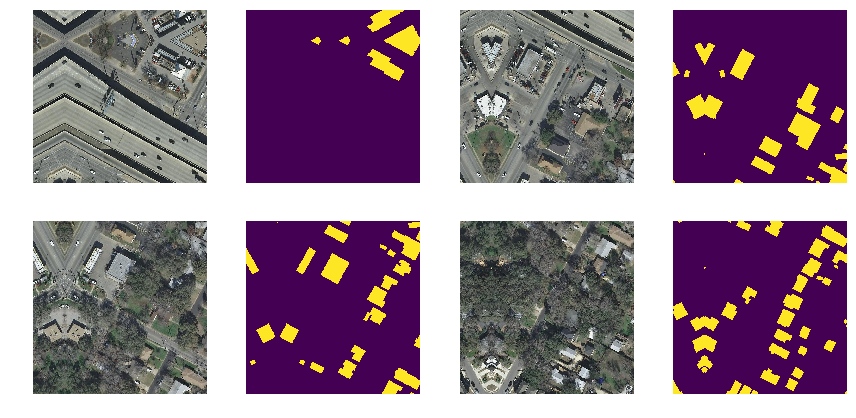

In [9]:
plt.figure(figsize=(12, 6))
plt_cnt = 0
for i in range(4):
    for f in file_list[i]:
        plt_cnt += 1
        plt.subplot(2, 4, plt_cnt)
        plt.imshow(utils.load_file(f))
        plt.axis('off')
plt.tight_layout()
plt.show()